## Read Drifter Data from EcoFOCI web

1986-2015 Quality Controlled Data is available from https://www.ecofoci.noaa.gov/drifters/efoci_drifterData.shtml

Formats and options change (as do headerlines and meta information) throughout the window of time available.  Usually, all files of a given year are well documented and similar.

Foci Drifter convention is +W

**ToDo**
- Daily standard deviation on drifters (remove data if greater 2-3 Standard Deviations)
- daily average is probably ok though spacially


In [1]:
import pandas as pd
import numpy as np
import xarray as xa

from erddapy import ERDDAP

import datetime


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean


In [2]:
import ssl

#to get past a pandas ssl issue with foci website
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#are all of these valid for BS/NBS/Arctic
floats = ['data2010/050796_y2010_withTandIce.asc',
'data2010/050797_y2010_withTandIce.asc',
'data2010/051973_y2010_withTandIce.asc',
'data2010/051975_y2010_withTandIce.asc',
'data2010/051976_y2010_withTandIce.asc',
'data2010/098684_y2010_withT.asc',
'data2010/098684_y2010_withTandIce.asc',
'data2010/098685_y2010_withTandIce.asc',
'data2010/098686_y2010_withTandIce.asc',
'data2010/098687_y2010_withTandIce.asc',
'data2010/098688_y2010_withTandIce.asc',
'data2010/098689_y2010_withTandIce.asc',
'data2010/098690_y2010_withTandIce.asc',
'data2010/098691_y2010_withTandIce.asc',
'data2010/098692_y2010_withTandIce.asc',
'data2010/098693_y2010_withTandIce.asc',
'data2010/50796_y2010.asc',
'data2010/50797_y2010.asc',
'data2010/51973_y2010.asc',
'data2010/51975_y2010.asc',
'data2010/51976_y2010.asc',
'data2010/72428_y2010.asc',
'data2010/91992_y2010.asc',
'data2010/98684_y2010.asc',
'data2010/98685_y2010.asc',
'data2010/98686_y2010.asc',
'data2010/98687_y2010.asc',
'data2010/98688_y2010.asc',
'data2010/98689_y2010.asc',
'data2010/98690_y2010.asc',
'data2010/98691_y2010.asc',
'data2010/98692_y2010.asc',
'data2010/98693_y2010.asc',
'data2011/050795_y2011_withT.asc',
'data2011/050798_y2011_withT.asc',
'data2011/050799_y2011_withT.asc',
'data2011/051972_y2011_withT.asc',
'data2011/051972_y2011_withTandIce.asc',
'data2011/051974_y2011_withT.asc',
'data2011/051974_y2011_withTandIce.asc',
'data2011/106694_y2011.asc',
'data2011/106694_y2011_withTandIce.asc',
'data2011/106695_y2011.asc',
'data2011/106695_y2011_withT.asc',
'data2011/106695_y2011_withTandIce.asc',
'data2011/106698_y2011.asc',
'data2011/106698_y2011_withT.asc',
'data2011/106698_y2011_withTandIce.asc',
'data2011/106699_y2011_withT.asc',
'data2011/106699_y2011_withTandIce.asc',
'data2011/106699a_y2011.asc',
'data2011/106699b_y2011.asc',
'data2011/50795_y2011.asc',
'data2011/50798_y2011.asc',
'data2011/50799_y2011.asc',
'data2011/51972_y2011.asc',
'data2011/51974_y2011.asc',
'data2012/106696_y2012_withTandIce.asc',
'data2012/106696a_y2012.asc',
'data2012/106696b_y2012.asc',
'data2012/106697_y2012_withT.asc',
'data2012/106697_y2012_withTandIce.asc',
'data2012/106697a_y2012.asc',
'data2012/106697b_y2012.asc',
'data2012/111967_y2012_withT.asc',
'data2012/111967_y2012_withTandIce.asc',
'data2012/111967a_y2012.asc',
'data2012/111967b_y2012.asc',
'data2012/111968_y2012_withTandIce.asc',
'data2012/111968a_y2012.asc',
'data2012/111968b_y2012.asc',
'data2012/113633_y2012.asc',
'data2012/113633_y2012_withT.asc',
'data2012/113634_y2012.asc',
'data2012/113634_y2012_withT.asc',
'data2012/113634_y2012_withTandIce.asc',
'data2012/113635_y2012.asc',
'data2012/113635_y2012_withTandIce.asc',
'data2012/113636_y2012_withTandIce.asc',
'data2012/113637_y2012_withTandIce.asc',
'data2012/113638_y2012_withTandIce.asc',
'data2012/113639_y2012.asc',
'data2012/113639_y2012_withTandIce.asc',
'data2012/113640_y2012.asc',
'data2012/113640_y2012_withTandIce.asc',
'data2012/113641_y2012.asc',
'data2012/113641_y2012_withTandIce.asc',
'data2012/113642_y2012_withTandIce.asc',
'data2012/119593_y2012_withTandIce.asc',
'data2012/119594_y2012_withTandIce.asc',
'data2012/119594a_y2012.asc',
'data2012/119594b_y2012.asc',
'data2012/119595_y2012_withTandIce.asc',
'data2012/119595a_y2012.asc',
'data2012/119595b_y2012.asc',
'data2012/119595c_y2012.asc',
'data2012/119596_y2012_withTandIce.asc',
'data2012/119596a_y2012.asc',
'data2012/119596b_y2012.asc',
'data2012/119597_y2012_withTandIce.asc',
'data2012/119597a_y2012.asc',
'data2012/119597b_y2012.asc',
'data2012/119598_y2012_withTandIce.asc',
'data2012/119598a_y2012.asc',
'data2012/119598b_y2012.asc',
'data2012/119599_y2012.asc',
'data2012/119599_y2012_withTandIce.asc',
'data2012/119600_y2012_withTandIce.asc',
'data2012/119600a_y2012.asc',
'data2012/119600b_y2012.asc',
'data2013/111969_y2013_withT.asc',
'data2013/111970_y2013.asc',
'data2013/111970_y2013_withT.asc',
'data2013/111971_y2013_withT.asc',
'data2013/111971_y2013_withTandIce.asc',
'data2013/111973_y2013.asc',
'data2013/111973_y2013_withT.asc',
'data2013/111974_y2013.asc',
'data2013/111974_y2013_withT.asc',
'data2013/111976_y2013_withT.asc',
'data2013/122532_y2013_withT.asc',
'data2013/122533_y2013_withT.asc',
'data2013/122534_y2013_withTandIce.asc',
'data2013/122535_y2013_withTandIce.asc',
'data2013/122536_y2013_withTandIce.asc',
'data2013/122537_y2013_withTandIce.asc',
'data2013/122538_y2013_withTandIce.asc',
'data2013/122539_y2013_withTandIce.asc',
'data2013/122540_y2013_withTandIce.asc',
'data2013/122541_y2013_withTandIce.asc',
'data2013/122542_y2013_withT.asc',
'data2013/122543_y2013.asc',
'data2013/122843_y2013_withTandIce.asc',
'data2013/122844_y2013_withTandIce.asc',
'data2013/122845_y2013_withT.asc',
'data2013/122846_y2013_withTandIce.asc',
'data2013/122847_y2013_withTandIce.asc',
'data2013/128951_y2013_withTandIce.asc',
'data2013/128952_y2013.asc',
'data2013/128952_y2013_withT.asc',
'data2013/128954_y2013_withTandIce.asc',
'data2013/128955_y2013_withTandIce.asc',
'data2014/136871_y2014_withT.asc',
'data2014/136871_y2014_withTandIce.asc',
'data2014/136873_y2014_withT.asc',
'data2014/136874_y2014_withT.asc',]

In [4]:
###list
data = {}
column_names=['latitude','longitude','year','doy','hhmm','drogue','battery','sst','satqual','ice']

#function to parse dates that are three column information
dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')

data={}
#for i in range(136859,136873,1):
for ifloat in floats:
    try:
        data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=29,
                    names=column_names,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=dateparse, 
                    index_col='year_doy_hhmm')})
        print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
    except:
        print(f"No data for {ifloat}")

<ipython-input-4-9e17fa33fb7e>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')


https://www.ecofoci.noaa.gov/drifters/data2010/050796_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/050797_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/051973_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/051975_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/051976_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098684_y2010_withT.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098684_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098685_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098686_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098687_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098688_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098689_y2010_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2010/098690_y2010_withTandIce.asc
https://www.ecofoc

* data resampled geometrically to daily values, gaps are not filled
* assumed transit in any given day is fairly small (couple of nautical miles)
* need to revisit for high resolution grid points? perhaps just subsample near synoptic time instead of average?
* better method? finding nearest model point or forcing datapoint to a known grid point? (the later is good if all my analysis grids where on the same resolution)

In [5]:
data_daily={}

for dataset in data:
    data_daily.update({dataset: data[dataset].resample('1D').mean()})

In [42]:
#export
for dataset in data_daily:
    data_daily[dataset].to_csv('data/drifter_data/'+dataset.split('/')[-1]+'.csv')

### Model and Reanalysis retrieval

See following notebook for details and discussion about various model/reanalysis/sat products used:
- [SST_ModelandReAnalysis.ipynb](SST_ModelandReAnalysis.ipynb)   

Initial method was fairly computationally intensive as it has a lookup function for each measurement - smaller subsets may be faster and local smaller subsets faster still

### load previously downloaded model data

In [9]:
#open_dataset vs load_dataset

#HROISST
xa_HROISST = xa.open_mfdataset('/Users/bell/in_and_outbox/data_sets/sst/NBS_SST_Models/HROISSTV2/NBS_CK_HROISST_*.nc')

xa_HROISST_subset = xa_HROISST.sel(time=slice('2010-01-01','2019-12-31'))



In [15]:
for dataset in data_daily:
    print(f"working on {dataset}")

    data_daily[dataset]['hroisst'] = np.nan
    data_daily[dataset]['hroisst_ice'] = np.nan
    data_daily[dataset]['lon_foci'] = np.nan
    try:
        for row, value in data_daily[dataset].iterrows():
            if np.isnan(value['sst']):
                pass
            else:
                data_daily[dataset]['lon_foci'][row] = -1*value['longitude']+360 #convert to +degE
                data_daily[dataset]['hroisst'][row] = xa_HROISST_subset.sel(time=str(row),
                                                                        latitude=value['latitude'],longitude=-1*value['longitude']+360,
                                                                        method='nearest')['sst']
                data_daily[dataset]['hroisst_ice'][row] = xa_HROISST_subset.sel(time=str(row),
                                                                        latitude=value['latitude'],longitude=-1*value['longitude']+360,
                                                                        method='nearest')['ice']            
    except:
        pass

working on data2010/050796_y2010_withTandIce.asc
working on data2010/050797_y2010_withTandIce.asc
working on data2010/051973_y2010_withTandIce.asc
working on data2010/051975_y2010_withTandIce.asc
working on data2010/051976_y2010_withTandIce.asc
working on data2010/098684_y2010_withT.asc
working on data2010/098684_y2010_withTandIce.asc
working on data2010/098685_y2010_withTandIce.asc
working on data2010/098686_y2010_withTandIce.asc
working on data2010/098687_y2010_withTandIce.asc
working on data2010/098688_y2010_withTandIce.asc
working on data2010/098689_y2010_withTandIce.asc
working on data2010/098690_y2010_withTandIce.asc
working on data2010/098691_y2010_withTandIce.asc
working on data2010/098692_y2010_withTandIce.asc
working on data2010/098693_y2010_withTandIce.asc
working on data2010/51975_y2010.asc
working on data2010/98686_y2010.asc
working on data2010/98688_y2010.asc
working on data2010/98689_y2010.asc
working on data2010/98690_y2010.asc
working on data2010/98691_y2010.asc
workin

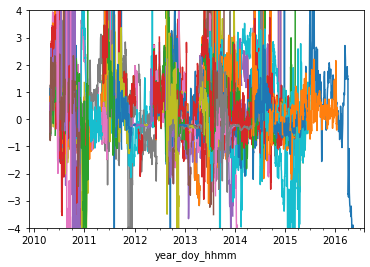

In [28]:
for dataset in data_daily:
    try:
        (data_daily[dataset].sst-data_daily[dataset].hroisst).plot(ylim=([-4,4]))
    except:
        pass

### Difference Map

In [19]:
#topo if wanted
server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
extent=[-179.5, -150, 52.5, 80]

bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))


def make_map(projection=ccrs.PlateCarree()):
    """subroutine to specify basemap"""
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

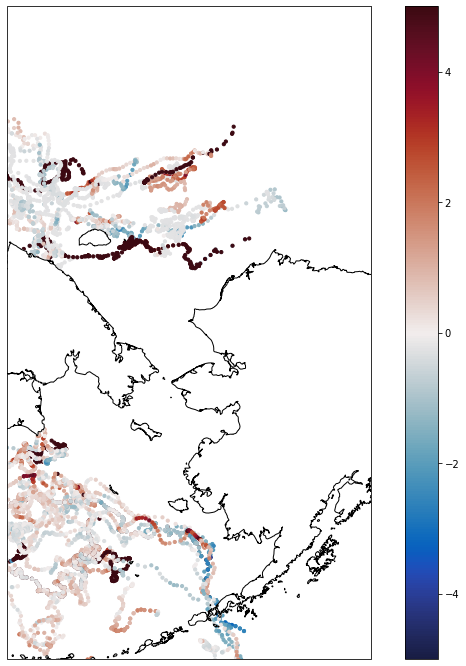

In [25]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for dataset in data_daily:
    try:
        c = ax.scatter(data_daily[dataset].longitude, data_daily[dataset].latitude, s=10,
                   c=(data_daily[dataset].sst-data_daily[dataset].hroisst), cmap=cmocean.cm.balance,
                   vmin=-5, vmax=5,
                   transform=transformation)
    except:
        pass
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig('All_ARGOSFOCIWeb_HROISST.png',dpi=300)

### Plot drifter differences where ice conc > .2

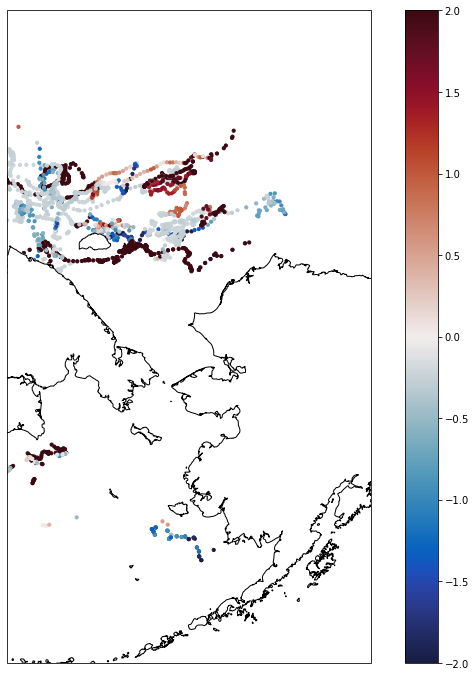

In [35]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for dataset in data_daily:
    dataset_masked = data_daily[dataset][data_daily[dataset].hroisst_ice >= .2]
    try:
        c = ax.scatter(dataset_masked.longitude, dataset_masked.latitude, s=10,
                   c=(dataset_masked.sst-dataset_masked.hroisst), cmap=cmocean.cm.balance,
                   vmin=-2, vmax=2,
                   transform=transformation)
    except:
        pass
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig('All_ARGOSFOCIWeb_HROISST_ICE.png',dpi=300)

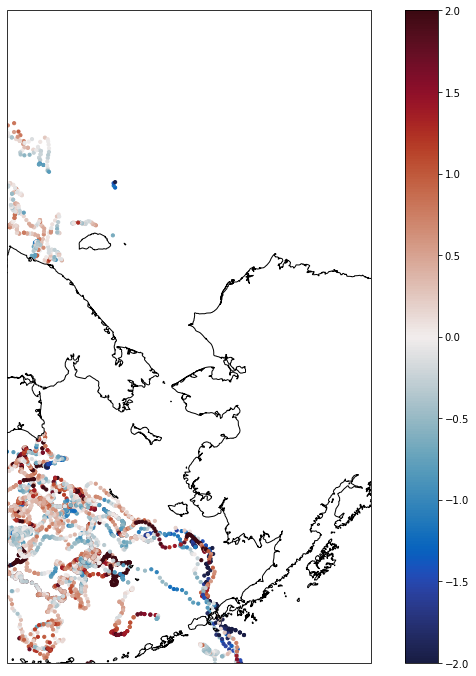

In [39]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for dataset in data_daily:
    [data_daily[dataset].hroisst_ice]
    dataset_masked = data_daily[dataset][np.isnan(data_daily[dataset].hroisst_ice)]
    try:
        c = ax.scatter(dataset_masked.longitude, dataset_masked.latitude, s=10,
                   c=(dataset_masked.sst-dataset_masked.hroisst), cmap=cmocean.cm.balance,
                   vmin=-2, vmax=2,
                   transform=transformation)
    except:
        pass
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig('All_ARGOSFOCIWeb_HROISST_NOICE.png',dpi=300)

### Plot Ice from model along drifter tracks

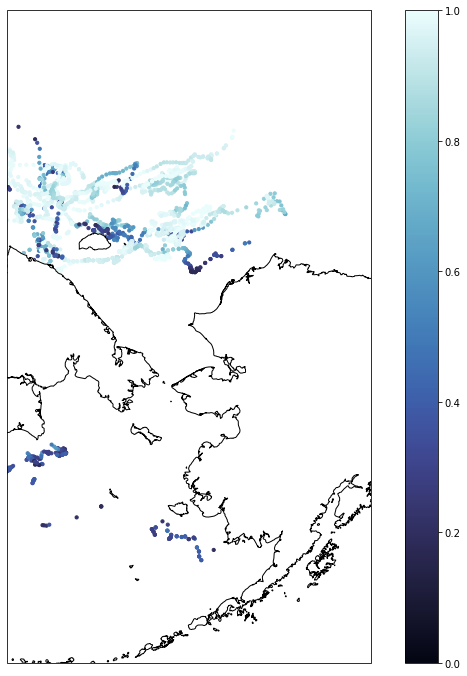

In [40]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for dataset in data_daily:
    try:
        c = ax.scatter(data_daily[dataset].longitude, data_daily[dataset].latitude, s=10,
                   c=(data_daily[dataset].hroisst_ice), cmap=cmocean.cm.ice,
                   vmin=0,vmax=1,
                   transform=transformation)
    except:
        pass
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig('All_ARGOSFOCIWeb_HROISST_ICEConc.png',dpi=300)

## ARGO Drifters from ERDDAP (2015+)

In [51]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'
e = ERDDAP(server=server_url)

In [52]:
df_d = pd.read_csv(e.get_search_url(response='csv', search_for='ARGOS and Drifters'))

In [53]:
df_d['Dataset ID']

0    2015_Argos_Drifters_NRT
1    2016_Argos_Drifters_NRT
2    2017_Argos_Drifters_NRT
3    2018_Argos_Drifters_NRT
4    2019_Argos_Drifters_NRT
5    2020_Argos_Drifters_NRT
Name: Dataset ID, dtype: object

In [54]:
year=2018
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': 170,
    'max_lon': 210,
    'min_lat': 55.0,
    'max_lat': 90.0,
    'min_time': str(year)+'-01-01T00:00:00Z',
    'max_time': str(year+1)+'-01-01T00:00:00Z'
}

constraints = {
    'lon360>=': kw['min_lon'],
    'lon360<=': kw['max_lon'],
    'latitude>=': kw['min_lat'],
    'latitude<=': kw['max_lat'],
    'time>=': kw['min_time'],
    'time<=': kw['max_time'],
}

In [55]:
try:
    print(str(year)+'_Argos_Drifters_NRT')
    arfloat=str(year)+'_Argos_Drifters_NRT'
    e = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )
    e.constraints=constraints
    e.dataset_id=arfloat

    dfs = e.to_pandas(index_col='time (UTC)',
                        parse_dates=True,
                        skiprows=(1,)  # units information can be dropped.
                        )
    dfs.columns = [x[1].split()[0] for x in enumerate(dfs.columns)]
except:
    pass

dfs.sample()

2018_Argos_Drifters_NRT


,trajectory_id,strain,voltage,latitude,sst,longitude,lon360
time (UTC),,,,,,,
2018-11-05 22:57:00+00:00,136863,3.0,14.0,61.982,5.24,178.229,178.229


## load previously downloaded model data

In [56]:
#open_dataset vs load_dataset

#HROISST
xa_HROISST = xa.open_dataset('/Users/bell/in_and_outbox/data_sets/sst/NBS_SST_Models/HROISSTV2/NBS_CK_HROISST_'+str(year)+'.nc')

xa_HROISST_subset = xa_HROISST['sst'].sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))

In [57]:
#UKMET
ukmet=True
xa_UKMET = xa.open_mfdataset('/Users/bell/in_and_outbox/data_sets/sst/NBS_SST_Models/UKMET/NBS_CK_UKMET_'+str(year)+'*.nc')

xa_UKMET_subset = xa_UKMET['analysed_sst'].sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))

In [58]:
#groupby and average hourly
df_hourly = {}
for group in dfs.groupby('trajectory_id').groups:
    df_hourly.update({group: dfs.groupby('trajectory_id').get_group(group).resample('1H').mean()})

In [59]:
for argosid in df_hourly:
    print(f"Working on {argosid}")
    df_hourly[argosid]['hroisst'] = np.nan
    df_hourly[argosid]['ukmetsst'] = np.nan

    for row, value in df_hourly[argosid].iterrows():
        if np.isnan(value['sst']):
            pass
        else:
            df_hourly[argosid]['hroisst'][row] = xa_HROISST_subset.sel(time=str(row),
                                                        latitude=value['latitude'],
                                                        longitude=value['lon360'],
                                                        method='nearest')
            if ukmet:
                df_hourly[argosid]['ukmetsst'][row] = xa_UKMET_subset.sel(time=str(row),
                                                        latitude=value['latitude'],
                                                        longitude=value['longitude'],
                                                        method='nearest')


Working on 136863
Working on 136866
Working on 136868
Working on 139910
Working on 139911
Working on 139912
Working on 139913
Working on 139914
Working on 139915
Working on 145469
Working on 145473
Working on 145474
Working on 145480
Working on 148276


## Maps and Plots

### Difference Plots

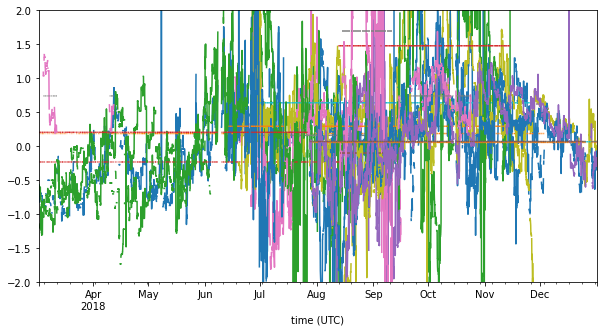

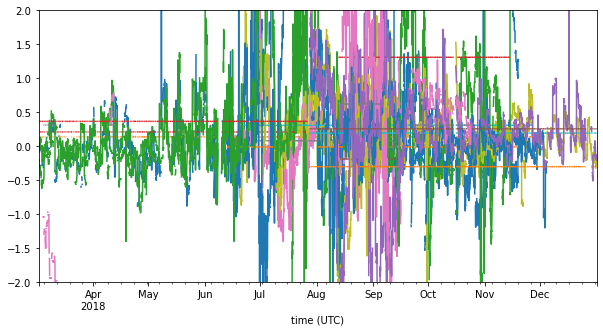

In [60]:
fig, axs = plt.subplots(1,1, figsize=(10, 5), facecolor='w', edgecolor='k')
for argosid in df_hourly:
    (df_hourly[argosid].sst-df_hourly[argosid].hroisst).plot(figsize=(10,5))
    (df_hourly[argosid].sst*0 + (df_hourly[argosid].sst-df_hourly[argosid].hroisst).mean()).plot(linestyle='--')
    axs.set_ylim([-2,2])
fig.savefig(str(year)+'_ARGOSNRT_HROISST_Timeseries.png',dpi=300)

fig, axs = plt.subplots(1,1, figsize=(10, 5), facecolor='w', edgecolor='k')
for argosid in df_hourly:
    (df_hourly[argosid].sst-df_hourly[argosid].ukmetsst).plot(figsize=(10,5))
    (df_hourly[argosid].sst*0 + (df_hourly[argosid].sst-df_hourly[argosid].ukmetsst).mean()).plot(linestyle='--')
    axs.set_ylim([-2,2])
fig.savefig(str(year)+'_ARGOSNRT_UKMET_Timeseries.png',dpi=300)

### Difference Map

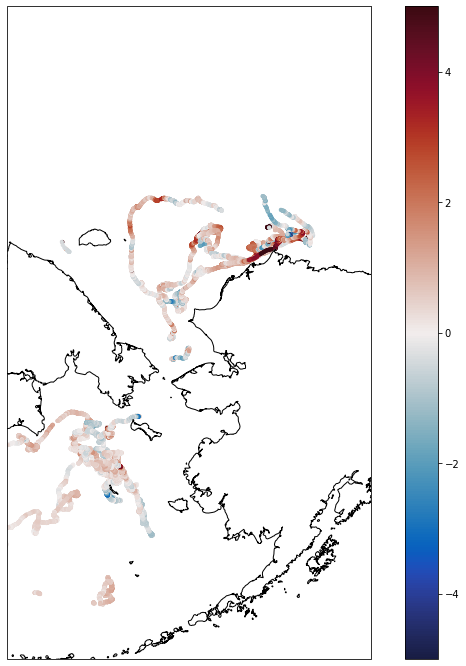

In [61]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for argosid in df_hourly:
    c = ax.scatter(df_hourly[argosid].longitude, df_hourly[argosid].latitude, s=10,
                   c=(df_hourly[argosid].sst-df_hourly[argosid].hroisst), cmap=cmocean.cm.balance,
                   vmin=-5, vmax=5,
                   transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig(str(year)+'_ARGOSNRT_HROISST.png',dpi=300)

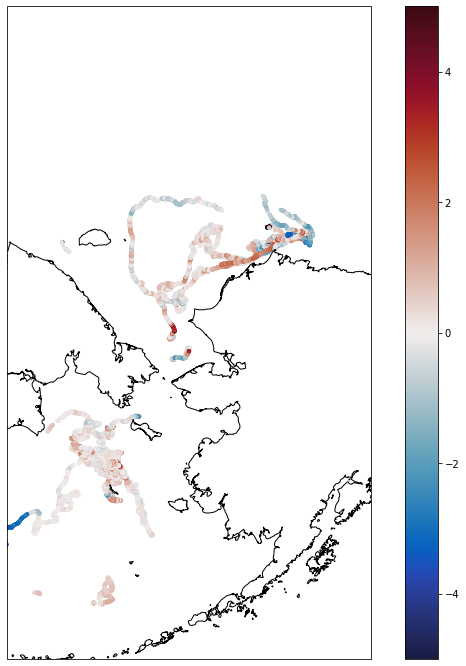

In [62]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for argosid in df_hourly:
    c = ax.scatter(df_hourly[argosid].longitude, df_hourly[argosid].latitude, s=10,
                   c=(df_hourly[argosid].sst-df_hourly[argosid].ukmetsst), cmap=cmocean.cm.balance,
                   vmin=-5, vmax=5,
                   transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig(str(year)+'_ARGOSNRT_UKMET.png',dpi=300)

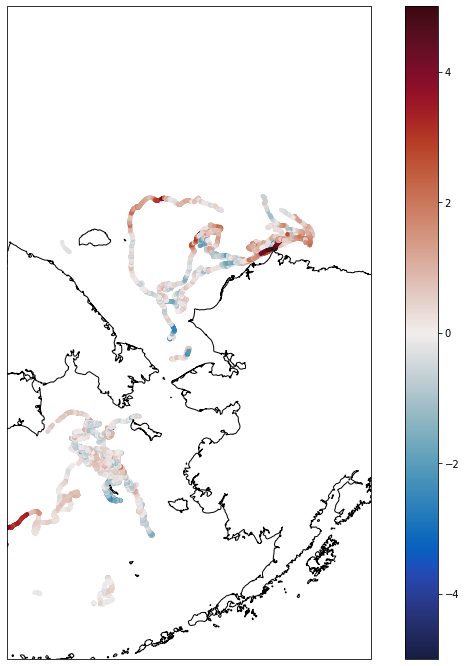

In [63]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

for argosid in df_hourly:
    c = ax.scatter(df_hourly[argosid].longitude, df_hourly[argosid].latitude, s=10,
                   c=(df_hourly[argosid].ukmetsst-df_hourly[argosid].hroisst), cmap=cmocean.cm.balance,
                   vmin=-5, vmax=5,
                   transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

fig.savefig(str(year)+'_ARGOSNRT_UKMET-HROISST.png',dpi=300)